# Part I 머신러닝
# chpater 8 차원축소

In [1]:
# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 8.1 차원의 저주

훈련세트의 차원이 클수록 과대적합 위험이 커진다

차원의 저주를 해결하는 해결책

    훈련 샘플의 밀도가 충분히 높아질 때까지 훈련 세트의 크기를 키운다
    

## 8.2 차원 축소를 위한 접근 방법

투영 : 한차원 내리기

매니폴드
    
    d차원 매니폴드는 국부적으로 d차원 초평면으로 보일 수 있는 n차원 공간의 일부이다.
    많은 차원 축소 알고리즘이 훈련 샘플이 좋여있는 매니폴드를 모델링하는 식으로 작동한다.
    이를 매니폴드 학습(manifold learning)이로가 한다.
    이는 대부분 실제 고차원 데이터셋이 더 낮은 저차우너 매니폴드에 가깝게 놓여있다는 매니폴드 가정 또는 매니폴드 가설에 근거한다.


모델을 훈련시키기 전에 훈련 세트의 차원을 감소 시키면 훈련 속도는 빨라지지만 항상 더 낫거나 간단한 솔류션이 되는 것은 아니다.

## 8.3 PCA

* PCA(주성분 분석, principal component analysis)

    가장 인기 있는 차원 축소 알고리즘
    
    먼저 데이터에 가까운 초평면을 정의한 다음에 데이터를 이 평면에 투영시킨다
    

각 주성분을 위해 PCA는 주성분 방향을 가리키고 원점에 중앙이 맞춰진 단위 벡터를 찾는다. 하나의 축에 단위 벡터가 반대 방향으로 두개 있으므로 PCA가 반환하는 단위 벡터의 방향은 일정하지 않다. 훈련세트를 조금 섞은 다음 다시 PCA를 적용하면 새로운 PC 중 일부가 원래 PC와 반대 방향일 수 있다. 그러나 일반적으로 같은 축에 놓여 있을 것이다. 어떤 경우에는 한쌍의 PC가 회전하거나 서로 바뀔수 있지만 보통은 같은 평면을 구상한다.

In [2]:
#3D 데이터셋 만들기
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [3]:
#주성분
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [4]:
# m : 샘플개수, n : 특성 개수
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [5]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [6]:
#d차원으로 투영하기
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [7]:
X2D_using_svd = X2D

In [8]:
#사이킷 런으로 데이터셋의 차원을 2로 줄이기
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [9]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [10]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

* 설명된 분산의 비율(explained variance ratio)

    각 주성분의 축을 따라 데이터셋의 분산 비율을 나타냄
    

In [11]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

분산의 84.2%가 첫 번째 PC를 따라 놓여 있고, 14.6%가 두번째 PC를 따라 놓여있다

In [13]:
#적절한 차원수 선택하기
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [15]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

그림 저장 explained_variance_plot


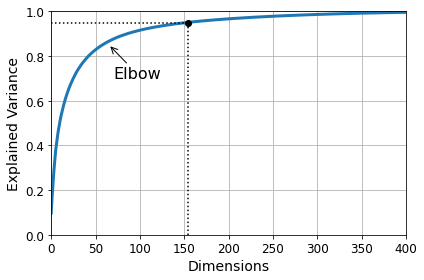

In [17]:
#차원 수에 대한 함수로 나타낸 설명된 분산
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
save_fig("explained_variance_plot")
plt.show()

설명된 분산의 빠른 성장이 멈추는 변곡점이 있다.

여기서는 차원을 약 100으로 축소해도 설명된 분산을 크게 손해 보지 않는다.

In [18]:
#압축을 위한 PCA
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [19]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # n_rows = ceil(len(instances) / images_per_row) 와 동일합니다:
    n_rows = (len(instances) - 1) // images_per_row + 1

    # 필요하면 그리드 끝을 채우기 위해 빈 이미지를 추가합니다:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # 배열의 크기를 바꾸어 28×28 이미지를 담은 그리드로 구성합니다:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # 축 0(이미지 그리드의 수직축)과 2(이미지의 수직축)를 합치고 축 1과 3(두 수평축)을 합칩니다. 
    # 먼저 transpose()를 사용해 결합하려는 축을 옆으로 이동한 다음 합칩니다:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # 하나의 큰 이미지를 얻었으므로 출력하면 됩니다:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

그림 저장 mnist_compression_plot


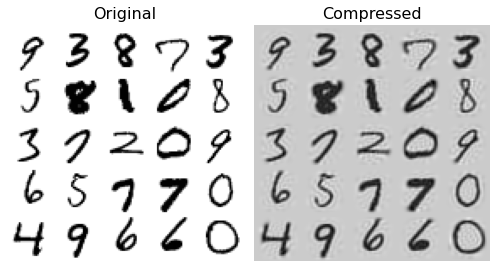

In [20]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

save_fig("mnist_compression_plot")

원본 훈련세트(왼쪽)

샘플을 압축한 후 복원한 결과(오른쪽, 154차원으로 압축하고 784차원으로 복원)

In [21]:
X_reduced_pca = X_reduced

In [22]:
X_reduced_pca

array([[-563.82559445,  376.21158528,  547.80926278, ...,   19.38905129,
         -14.8845654 ,   54.51253826],
       [-247.60677316,  594.11581248, -761.17658857, ...,  -71.45002811,
         -35.42725361,   -6.14753115],
       [ -76.10689476, -718.88626737, -621.34715826, ...,  -33.70667711,
          46.79720596,   41.99423193],
       ...,
       [ 446.89768573,  200.53844515, -326.08785441, ...,   22.88163079,
          57.77169794,  -28.3108812 ],
       [ 794.82898691, -164.9787896 ,   48.41468921, ...,    4.61839146,
          -2.14649477,   17.03401382],
       [-903.11423891, -456.07653996, -139.5851229 , ...,   -2.61355561,
          -9.49564537,    2.05450968]])

In [23]:
#랜덤 PCA
rnd_pca = PCA(n_components = 154, svd_solver = "randomized", random_state = 42)
X_reduced = rnd_pca.fit_transform(X_train)

* 랜덤 PCA

    확률적 알고리즘을 사용해 처음 d개의 주성분에 대한 근삿값을 빠르게 찾기
    
    d가 n 보다 많이 작으면 완전 SVD 보다 훨씬빠르다

* 점진적 PCA(incremental PCA, IPCA)

    PCA 구현의 문제는 SVD알고리즘을 실행하기 위해전체 훈련세트를 메모리에 올려야한다는 문제점을 보완 하기 위한 알고리즘
    
    훈련세트를 미니배치로 나눈뒤 IPC 알고리즘에 한번에 하나씩 주입
    
    훈련셑가 클 때 유용하고 온라인으로 PCA를 적용 할 수도 있다.

In [25]:
#점진적 PCA
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components = 154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="")
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)

....................................................................................................

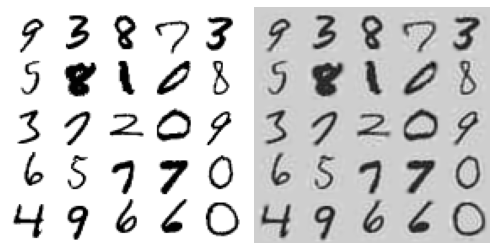

In [26]:
#압축이 잘 됬는지 확인
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [27]:
X_reduced_inc_pca = X_reduced

In [28]:
np.allclose(pca.mean_, inc_pca.mean_)

True

In [29]:
np.allclose(X_reduced_pca, X_reduced_inc_pca)

False

아주 훌륭한 근사치를 제공하지만 완벽하지는 않다.

In [30]:
#memmap 사용하기
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

In [31]:
del X_mm

In [32]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, n_components=154)

In [33]:
#주성분 개수를 바꾸어가며 점진적 PCA와 랜덤 PCA에 비해 일반 PCA시간 재기
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

In [34]:
import time

for n_components in (2, 10, 154):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components, svd_solver="full")
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")

    for pca in (regular_pca, inc_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print("    {}: {:.1f} 초".format(pca.__class__.__name__, t2 - t1))

n_components = 2
    PCA: 6.6 초
    IncrementalPCA: 9.6 초
    PCA: 1.3 초
n_components = 10
    PCA: 5.9 초
    IncrementalPCA: 10.0 초
    PCA: 1.5 초
n_components = 154
    PCA: 6.1 초
    IncrementalPCA: 14.6 초
    PCA: 4.4 초


Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

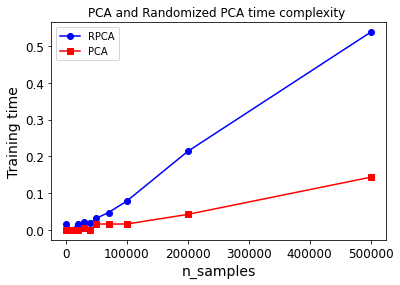

In [36]:
#데이터셋의 크기를 바꾸어 가며 일반 PCA와 랜덤 PCA를 비교
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components=2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

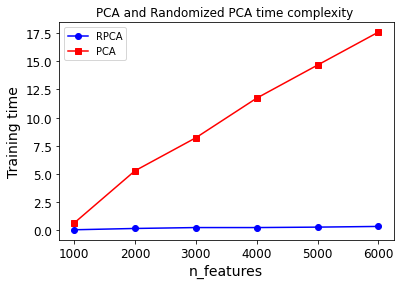

In [35]:
#특성의 개수를 달리하면서 2000개 샘플이 있는 데이터셋에서 성능 비교
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components=2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")
plt.show()

## 8.4 커널 PCA

* 커널 PCA(kPCA)

    차원 축소를 위한 복잡한 비선형 투영을 수행
    
    투영된 후에 샘플의 군집을 유지하거나 꼬인 매니폴드에 가까운 데이터셋을 펼칠때 유용

In [38]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [39]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

그림 저장 kernel_pca_plot


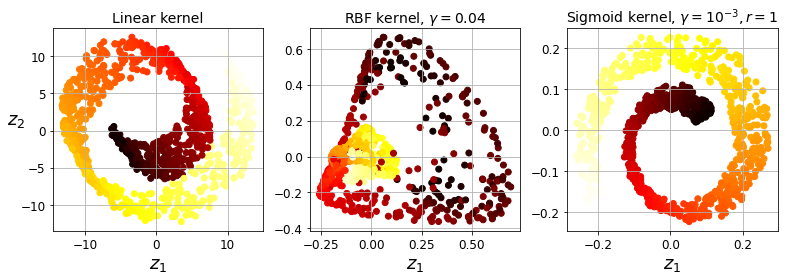

In [40]:
#여러 가지 커널의 kPCA를 사용해 2D로 축소시킨 스위스롤
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

save_fig("kernel_pca_plot")
plt.show()

그림 저장 preimage_plot


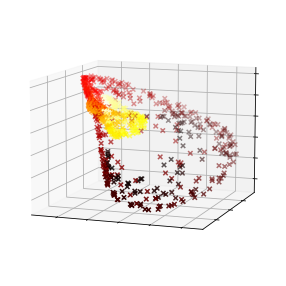

In [41]:
# 커널 PCA와 재구성 원상 오차(1)
plt.figure(figsize=(6, 5))

X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap=plt.cm.hot, marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

save_fig("preimage_plot", tight_layout=False)
plt.show()

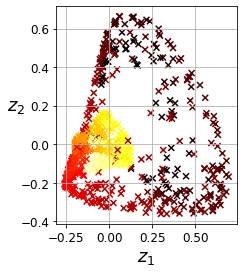

In [42]:
# 커널 PCA와 재구성 원상 오차(2)
X_reduced = rbf_pca.fit_transform(X)

plt.figure(figsize=(11, 4))
plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker="x")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

    kPCA는 비지도학습이기 때문에 좋은 커널과 하이퍼파라미터를 선택하기 위한 명확한 성능 측정 기준이 없다
    하지만 차원 축소는 종종 지도 학습의 전처리 단곌 활용되므로 그리드 탐색을 사용하여 주어진 문제에서 성능이 가장 좋은 커널과 하이퍼파라미터를 선택할 수 있다.

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kpca", KernelPCA(n_components = 2)),
    ("log_reg", LogisticRegression())
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03,0.05,10),
    "kpca__kernel": ["rbf","sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv = 3)
grid_search.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [45]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


* 재구성 원상(pre-image)

    재구성된 포인트에 가깝게 매핑된 원본 공간의 포인트
    
    원상을 얻ㅔ 되면 원본 샘플과의 제곱 거리를 측정할 수 있다
    
    투영된 샘플을 훈련세트로, 원본 샘플을 타깃으로 하는 지도 학습 회귀 모델 훈련

In [48]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma = 0.0433,
                   fit_inverse_transform = True)

X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [50]:
#재구성 오차 계산
from sklearn.metrics import mean_squared_error
mean_squared_error(X,X_preimage)

32.7863087957661

## 8.5 LLE

* 지역 선형 임베딩(locally linear embedding, LLE)

    ==비선형 차원 축소(nonlinear dimensionlity reduction, NLDR)
    
    투영에 의존하지 아늫은 매니폴드 학습
    
    먼저 각 훈련 샘플이 가장 가까운 이웃에 얼마나 선형적으로 연관되었는지 측정한 후 국부적인 관계가 가장 잘 보존되는 훈련 세트의 저차원 표현을 찾는다
    
    잡음이 너무 많지 않은 경우 꼬인 매니폴드를 펼치는데 잘 작동한다

In [55]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [56]:
#스위스롤 펼치기
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 10)
X_reduced = lle.fit_transform(X)

그림 저장 lle_unrolling_plot


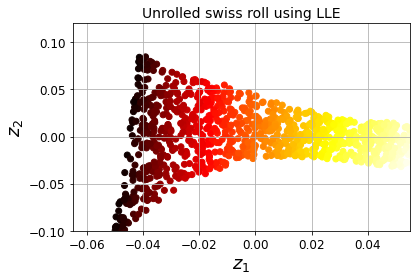

In [57]:
#LLE를 사용하여 펼쳐진 스위스롤
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

save_fig("lle_unrolling_plot")
plt.show()

## 8.6 다른 차원 축소 기법

* 랜덤 투영(random projection)

    랜덤한 선형 투영을 사용해 데이터를 저차원 공간으로 투영
    
    실제로 거리를 잘 보존
    
* 다차원 스케일링(multidimensional scaling, MDS)

    샘플 간의 거리를 보존하면서 차원을 축소
    
* Isomap

    각 샘플을 가장 가까운 이웃과 연결하는 식으로 그래프를 만든다.
    
    그런 다음 샘플 간의 지오데식 거리(geodesic distance)를 유지하면서 차원을 축소
    
* t-SNE(t-distributed stochastic neighbor embedding)

    비슷한 샘플은 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록 하면서 차원 축소
    
    주로 시각화에 많이 사용되며 특히 고차원 공간에 있는 샘플의 군집을 시각화할 때 사용된다.
    
    (ex, MNIST 데이터셋을 2D로 시각화 할 때)
    
* 선형 판별 분석(linear discriminant analysis, LDA)

    사실 분류 알고리즘
    
    훈련 과정에서 클래스 사이를 가장 잘 구분하는 축을 학습
    
    이 축은 데이터가 투영되는 초평면을 정의하는 데 사용 할 수 있다.
    
    장점 : 투영을 통해 가능한 클래스를 멀리 떨어지게 유지 시키므로 SVM 분류기 같은 다른 분류 알고리즘을 적용하기 전에 차원을 축소시키는 데 좋다

## 8.7 연습문제

1. 데이터셋의 차원을 축소하는 주요 목적은 무엇인가요? 대표적인 단점은 무엇인가요?

* 목적
    
    훈련 알고리즘의 속도를 높이기 위해(어떤 경우에는 잡음과 중복된 특성을 삭제할 수도 있어 훈련 알고리즘의 성능르 높임)
    
    데이터를 시각화 하고 가장 중요한 특성에 대한 통찰을 얻기 위해
    
    메모리 공간을 절약하기 위해(압축)
    
* 단점

    일부 정보를 잃어버려 훈련 알고리즘의 성능을 감소시킬 수 있다.
    
    계산 비용이 높다
    
    머신러닝 파이프라인의 복잡도를 증가 시킨다
    
    변환된 데이터를 이해하기 어려운 경우가 많다

2. 차원의 저주란 무엇인가요?

    저차원 공간에는 없는 많은 문제가 고차원 공간에서 일어난다는 사실을 뜻함
    머신러닝에서 무작위로 선택한 고차원 벡터는 매우 희소해서 과대적합의 위험이 크고, 많은 양의 데이터가 있지 않으면 데이터에 있는 패턴을 잡아내기 매우 어려운 것이 흔한 현상이다

3. 데이터셋의 차원을 축소시키고 나서 이 작업을 원복할 수 있나요? 할 수 있다면 어떻게 가능할까요? 가능하지 않다면 왜일까요?

    여기에서 설명한 알고리즘 중 하나를 사용해 데이터셋의 차원이 축소되면 일부 정보가 차원 축소 과정에서 사라지기 때문에 이를 완벽하게 되돌리는 것은 불가능하다
    (PCA같은) 일부 알고리즘은 비교적 원본과 비슷한 데이터셋을 재구성할 수 있는 간단한 역변환 방법을 가지고 있지만
    (T-SNE 같은) 다른 알고리즘들은 그렇지 않다

4. 매우 비선형적인 데이터셋의 차원을 축소하는 데 PCA를 사용할 수 있을까요?

    PCA는 불필요한 차원을 제거할 수 있기 때문에 매우 비선형적이더라도 대부분의 데이터셋에서 차원을 축소하는데 사용할 수 있다.
    그러나 불필요한 차원이 없다면(예를 들면 스위스롤 데이터셋) PCA의 차원 축소는 너무 많은 정보를 잃게 만든다.
    즉, 스위스롤을 펼쳐야하며 말려진 것을 뭉개며 안된다

5. 설명된 분산을 95%로 지정한 PCA를 1,000개의 차원을 가진 데이터셋에 적용한다고 가정하겠습니다. 결과 데이터셋의 차원은 얼마나 될까요?

    데이터셋에 따라 다르다
    차원 수에 대한 함수로 설명된 분산의 그래프를 그려보는 것이 데이터셋에 내재된 차원수를 대략 가늠할 수있는 한가지 방법이다

6. 기본 PCA, 점진적 PCA, 랜덤 PCA, 커널 PCA는 어느 경우에 사용될까요?

    기본 PCA가 우선적으로 사용되만 데이터셋 크기가 메모리에 맞을 때에 가능하다
    점진적 PCA는 메모리에 담을 수 없는 대용량 데이터셋에 적합하다.
    하지만 PCA보다 느리므로 데이터셋이 메모리 크기에 맞으면 기본 PCA를 사용해야 한다.
    점전직 PCA는 새로운 샘플이 발생될 떄 마다 실시간으로 PCA를 적용해야 하는 온라인 작업에 사용 가능하다
    랜덤 PCA는 데이터셋이 메모리 크기에 맞고 차원을 크게 축소시킬때 사용된다.
    이 경우에는 기본 PCA보다 훨씬 빠르다
    커널 PCA는 비선형 데이터셋에 유용하다

7. 어떤 데이터셋에 적용한 차원 축소 알고리즘의 성능을 어떻게 평가할 수 있을까요?

    직관적으로 데이터셋에 너무 많은 정보를 잃지 않고 차원을 많이 제거할 수 있다면 차원 축소 알고리즘이 잘 작동한것이다.
    이를 측정하는 한 가지 방법은 역변환을 수행해서 재구성 오차를 측정하는 것이다.
    하지만 모든 차원 축소 알고리즘이 역변환을 제공하지는 않는다.
    만약 차원 축소를 다른 머신러닝 알고리즘(예를들면 랜덤 포레스트 분류기)을 적용하기 전에 전처리 단계로 사용한다면 두 번째 알고리즘의 성능을 측정해 볼수 있다.
    즉, 차원 축소가 너무 많은 정보를 잃지 않았다면 원본 데이터셋을 사용했을 때와 비슷한 성능이 나와야한다

8. 두 개의 차원 축소 알고리즘을 연결할 수 있을까요?

    당연히 두개의 차원 축소 알고리즘을연결 할 수 있다.
    PCA로 불필요한 차원을 대폭 제거하고 난 다음 LLE 같이 훨씬 느린 알고리즘을 적용하는 것이 대표적인 사례이다
    이런 2단계 방식은 LLE만 사용했을때와 거의 비슷한 성능을 내지만 속도가 몇분의 1로 줄어들 것이다

9. (3장에서 소개한) MNIST 데이터셋을 로드하고 훈련 세트와 테스트 세트로 분할합니다 (처음 60,000개는 훈련을 위한 샘플이고 나머지 10,000개는 테스트용입니다). 이 데이 터셋에 랜덤 포레스트 분류기를 훈련시키고 얼마나 오래 걸리는지 시간을 잰 다음, 테스트 세트로 만들어진 모델을 평가합니다. 그런 다음 PCA를 사용해 설명된 분산이 95%가 되도록 차원을 축소합니다. 이 축소된 데이터셋에 새로운 랜덤 포레스트 분류기를 훈련시키고 얼마나 오래 걸리는지 확인합니다. 훈련 속도가 더 빨라졌나요? 이제 테스트 세트에서 이분류기를 평가해보세요. 이전 분류기와 비교해서 어떤가요?

In [58]:
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

이 데이터셋에 랜덤 포레스트 분류기를 훈련시키고 얼마나 오래 걸리는지 시간을 잰 다음, 테스트 세트로 만들어진 모델을 평가한다

In [59]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [60]:
import time

t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

In [62]:
print("훈련 시간: {:.2f}s".format(t1 - t0))

훈련 시간: 45.18s


In [63]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9705

PCA를 사용해 설명된 분산이 95%가 되도록 차원 축소

In [64]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [65]:
rnd_clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
t0 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

In [67]:
print("훈련 시간: {:.2f}s".format(t1 - t0))

훈련 시간: 117.66s


시간이 늘었다

테스트 세트에서 이 분류기를 평가해라, 이전 분류기와 비교해서 어떤가

In [68]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9481

In [69]:
#소프트 맥스 회귀
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

C:\Annaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
print("훈련 시간: {:.2f}s".format(t1 - t0))

훈련 시간: 14.73s


In [71]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9255

In [72]:
#축소된 데이터셋에 소프트 맥스 회귀 모델 훈련
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

C:\Annaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
print("훈련 시간: {:.2f}s".format(t1 - t0))

훈련 시간: 6.11s


속도가 빨라짐

In [74]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9201

성능이 감소되었지만 애플리케이션에 따라 2배 이상의 속도 향상에 대한 댓가로 적절함

PCA는 속도를 아주 빠르게 만들어 주지만 항상 그런것으 아니다

10. t-SNE 알고리즘을 사용해 MNIST 데이터셋을 2차원으로 축소시키고 맷플롯립으로 그래 프를 그려보세요. 이미지의 타깃 클래스마다 10가지 색상으로 나타낸 산점도를 그릴 수 있습니다. 또는 산점도의 각 포인트를 이에 상응하는 샘플의 클래스(0에서 9까지 숫자)로 바꾸거나 숫자 이미지 자체의 크기를 줄여서 그릴 수도 있습니다(모든 숫자를 다 그리면 그래프가 너무 복잡해지므로 무작위로 선택한 샘플만 그리거나, 인접한 곳에 다른 샘플이 그려져 있지 않은 경우에만 그립니다). 잘 분리된 숫자의 군집을 시각화할 수 있을 것입 니다. PCA, LLE, MDS 같은 차원 축소 알고리즘을 적용해보고 시각화 결과를 비교해보 세요.

In [75]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

In [76]:
# t-SNE를 사용해 2D로 축소해 그래프로 나타내기
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

C:\Annaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Annaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


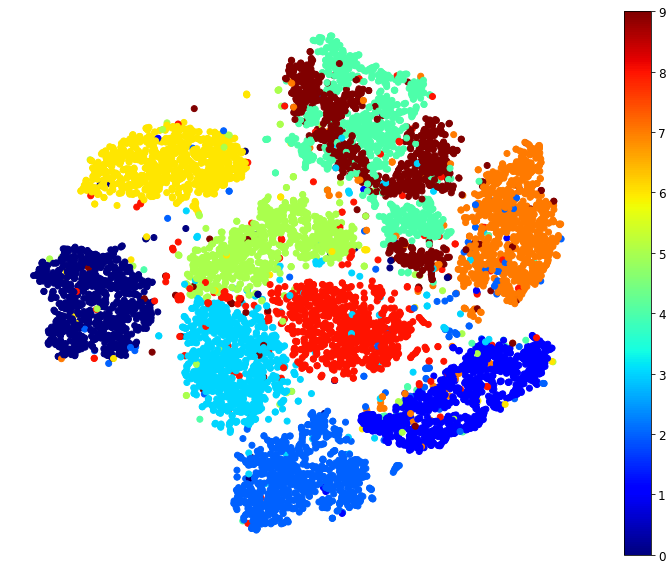

In [77]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

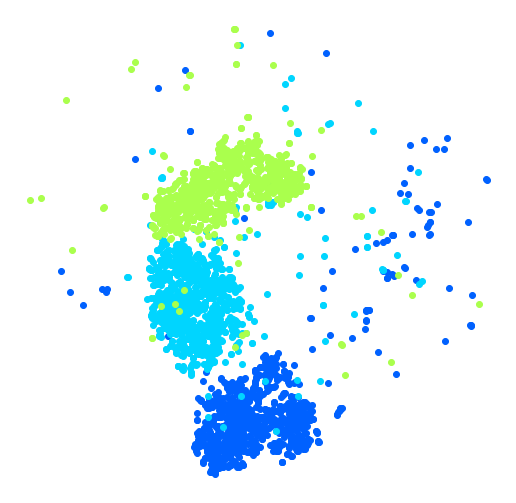

In [78]:
# 2,3,5 에 집중해서 보기
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

In [79]:
# 2,3,5에 t-SNE실행
idx = (y == 2) | (y == 3) | (y == 5) 
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

C:\Annaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Annaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


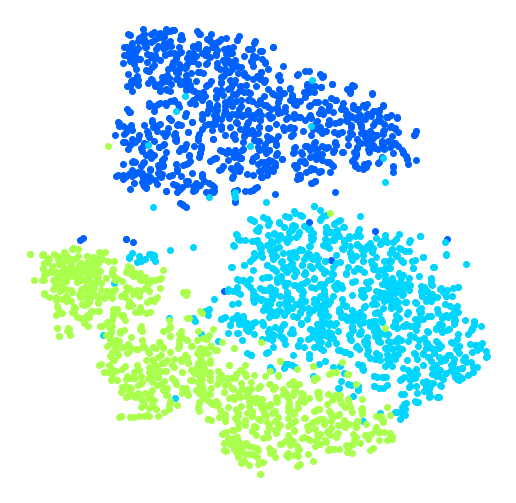

In [80]:
plt.figure(figsize=(9,9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

군집이 덜 겹쳐짐

하지만 3이 여러군데 흩어져 있음

In [81]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # 입력 특성의 스케일을 0에서 1 사이로 만듭니다.
    X_normalized = MinMaxScaler().fit_transform(X)
    # 그릴 숫자의 좌표 목록을 만듭니다.
    # 반복문 아래에서 `if` 문장을 쓰지 않기 위해 시작할 때 이미 그래프가 그려져 있다고 가정합니다.
    neighbors = np.array([[10., 10.]])
    # 나머지는 이해하기 쉽습니다.
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # 현재 그래프의 축을 가져옵니다.
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

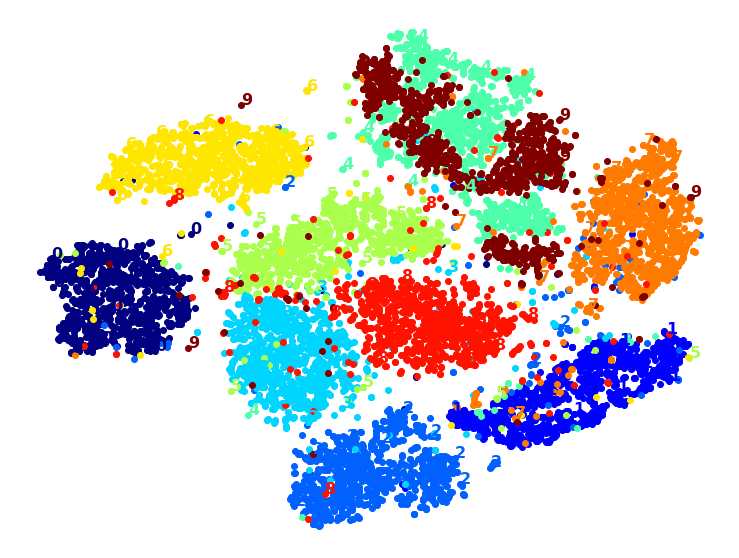

In [82]:
plot_digits(X_reduced, y)

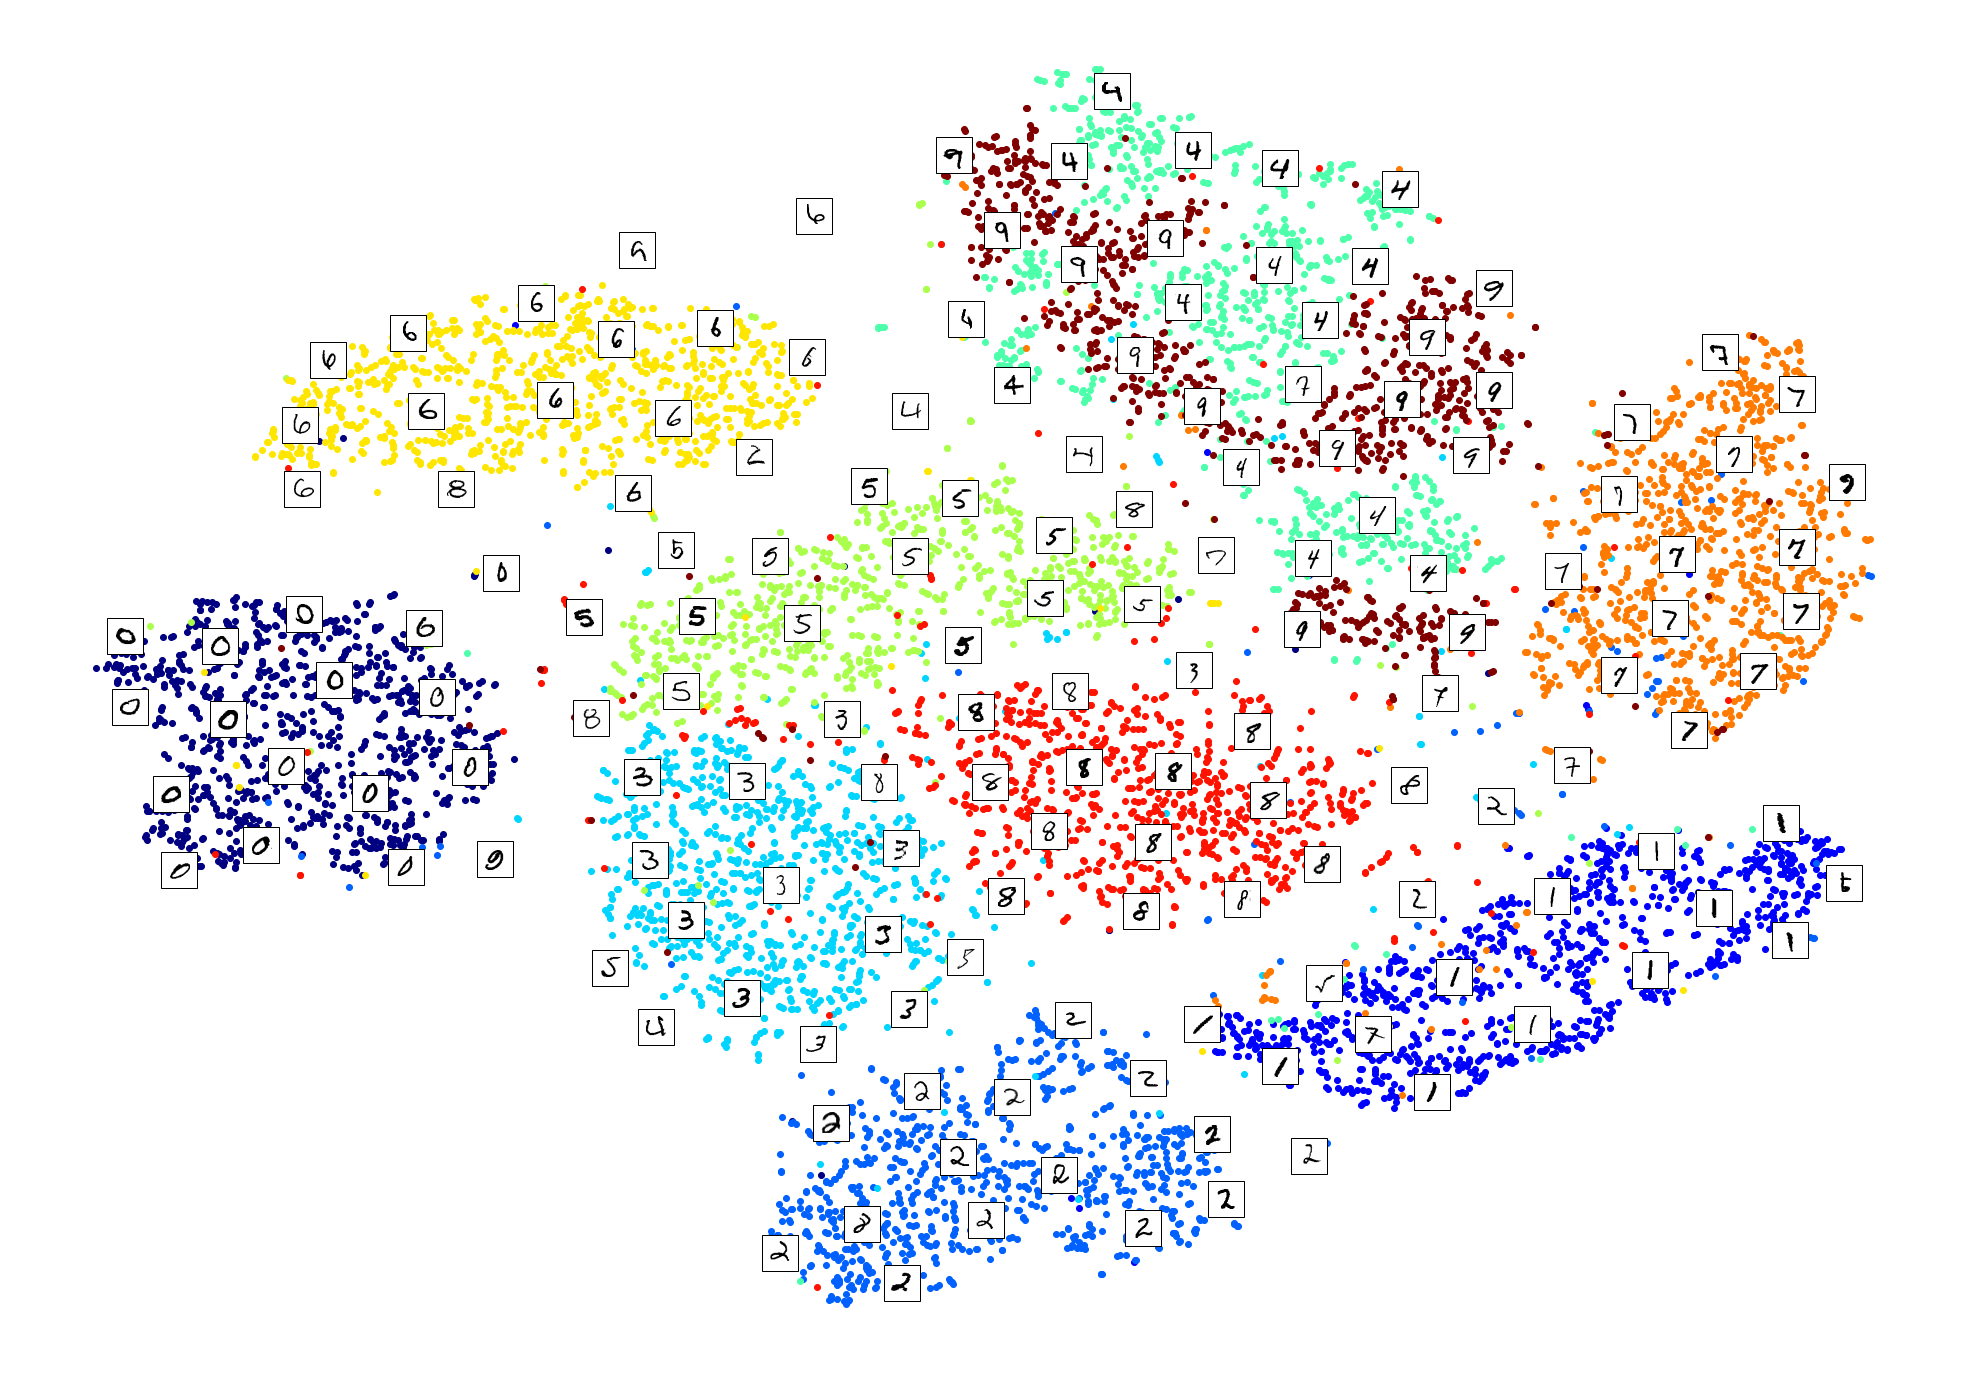

In [83]:
plot_digits(X_reduced, y, images=X, figsize=(35, 25))

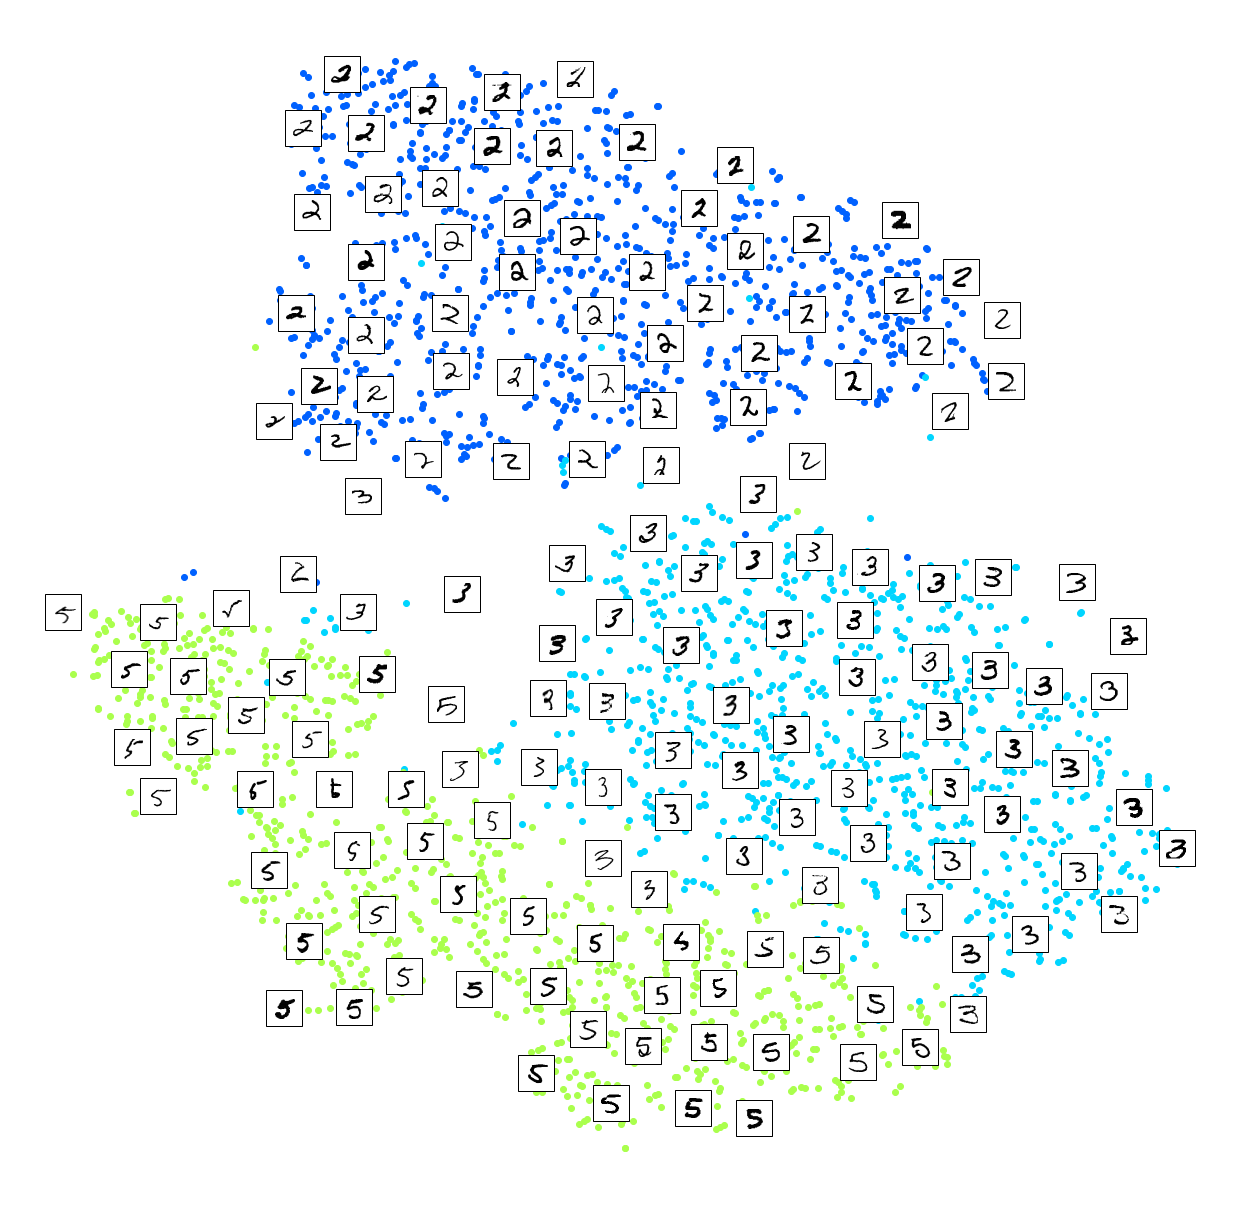

In [85]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))

PCA 시간: 0.2s.


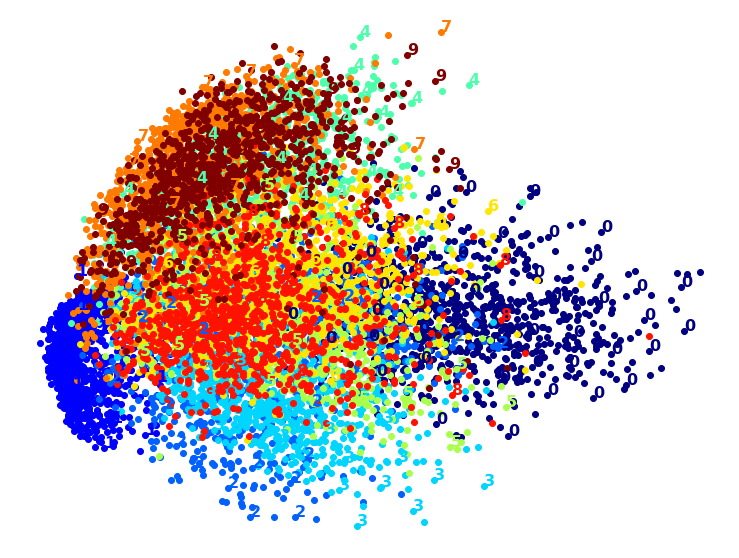

In [86]:
#PCA
from sklearn.decomposition import PCA
import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA 시간: {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_reduced, y)
plt.show()

LLE 시간: 16.1s.


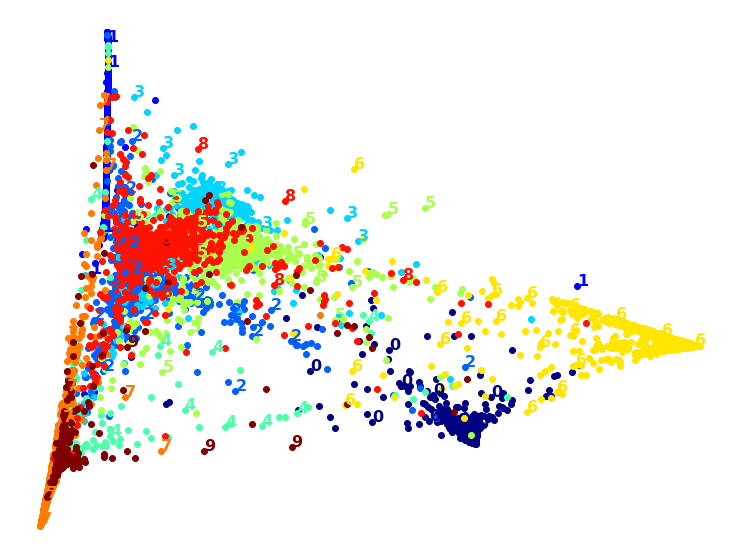

In [87]:
#LLE
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("LLE 시간: {:.1f}s.".format(t1 - t0))
plot_digits(X_lle_reduced, y)
plt.show()

PCA+LLE 시간: 18.1s.


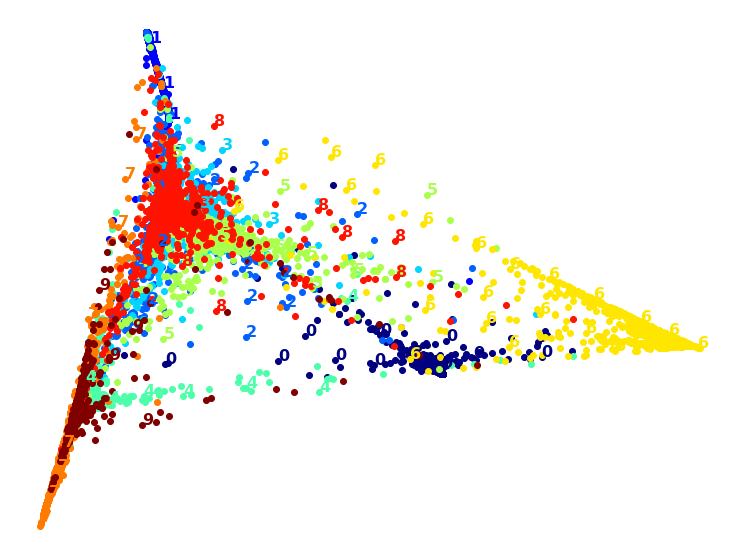

In [88]:
#분산의 95%를 보존하도록 먼저 PCA 적용
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print("PCA+LLE 시간: {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_lle_reduced, y)
plt.show()

MDS 시간 178.1s (on just 2,000 MNIST images instead of 10,000).


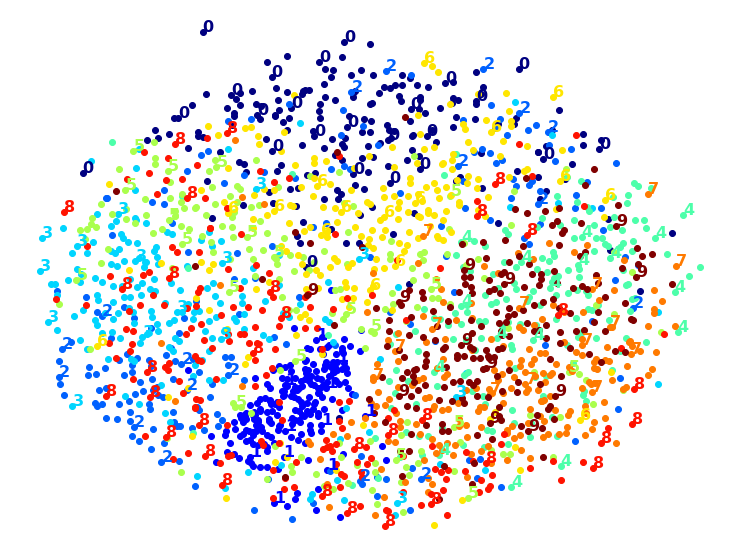

In [89]:
# MDS
# 너무 오래 걸릴것 같아서 샘플을 줄임
from sklearn.manifold import MDS

m = 2000
t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
t1 = time.time()
print("MDS 시간 {:.1f}s (on just 2,000 MNIST images instead of 10,000).".format(t1 - t0))
plot_digits(X_mds_reduced, y[:m])
plt.show()

PCA+MDS 시간 172.4s (on 2,000 MNIST images).


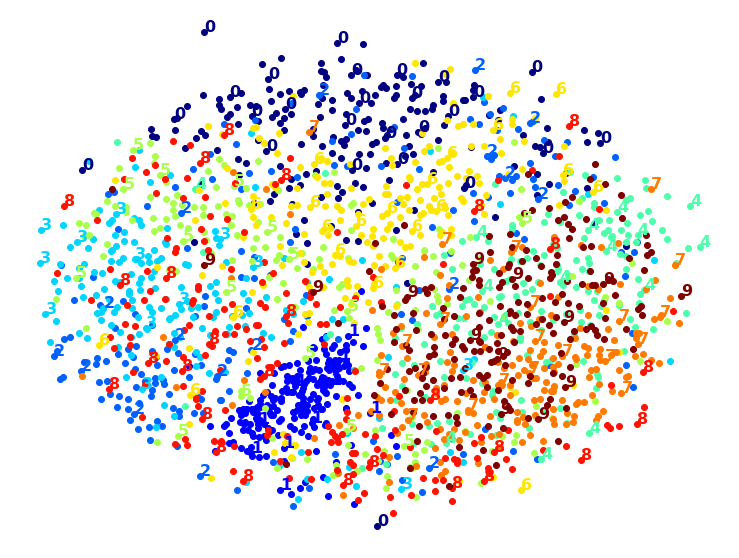

In [90]:
#PCA 적용
from sklearn.pipeline import Pipeline

pca_mds = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("mds", MDS(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:2000])
t1 = time.time()
print("PCA+MDS 시간 {:.1f}s (on 2,000 MNIST images).".format(t1 - t0))
plot_digits(X_pca_mds_reduced, y[:2000])
plt.show()

LDA 시간 1.8s.


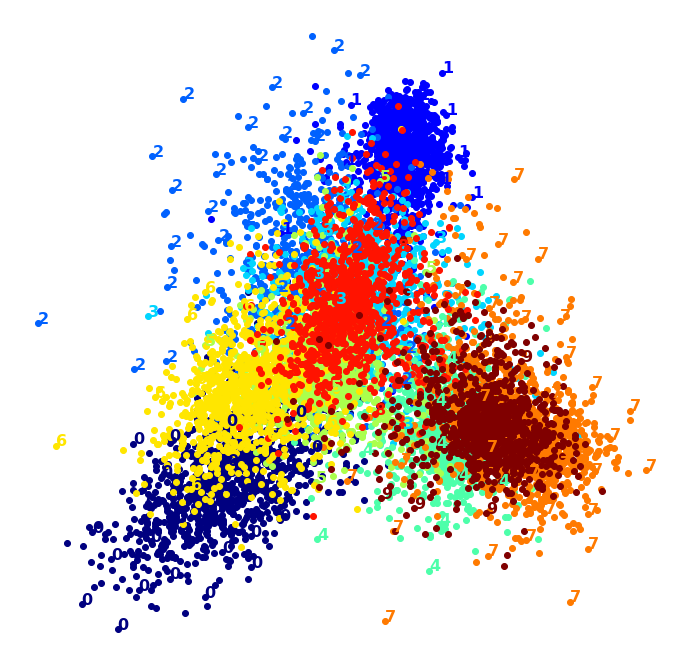

In [91]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print("LDA 시간 {:.1f}s.".format(t1 - t0))
plot_digits(X_lda_reduced, y, figsize=(12,12))
plt.show()

C:\Annaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Annaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE 시간 64.8s.


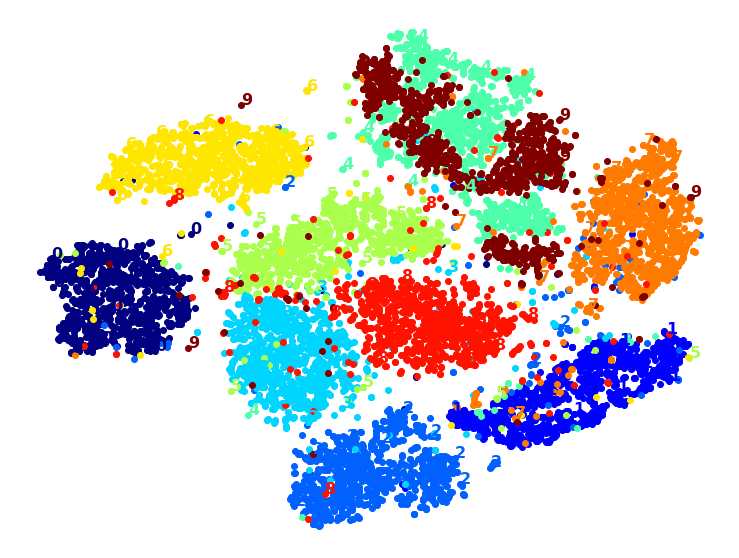

In [92]:
# t-SNE
from sklearn.manifold import TSNE

t0 = time.time()
X_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("t-SNE 시간 {:.1f}s.".format(t1 - t0))
plot_digits(X_tsne_reduced, y)
plt.show()

C:\Annaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Annaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


PCA+t-SNE 시간 70.1s.


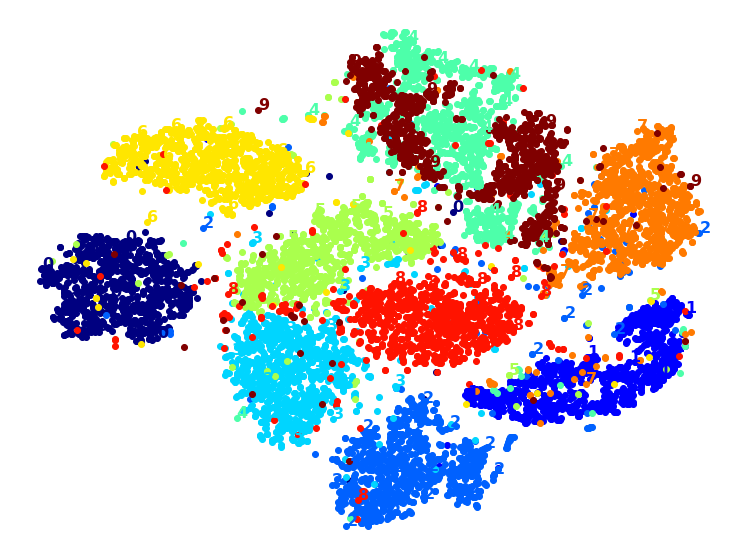

In [93]:
# PCA 적용
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE 시간 {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y)
plt.show()